In [15]:
#Goal of cell = goc
#goc, load in appropriate data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#empty list for txt file names
years = []
#columns followed by years
coln = [3,5,6,8,9,10,11,12,16,17,18,21,22,23,24,25,26,30,31,32,37,49,50,51,52,53,54,58,59,60,65]
colname = ['visitor','vgn','home','hgn','vscore','hscore','outs','d/n','park','at','time','vab','vhit','v2b','v3b','vhr','vrbi','vwalk','viwalk','vstrik','vlob','hab','hhit','h2b','h3b','hhr','hrbi','hwalk','hiwalk','hstrik','hlob']
#eventually we will run all the years with [i] at for filenames
#for i in range(len(years)):
mast = pd.read_csv('GL2015.TXT',sep=",",usecols= coln, names = colname)
mast.head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hab,hhit,h2b,h3b,hhr,hrbi,hwalk,hiwalk,hstrik,hlob
0,SLN,1,CHN,1,3,0,54,N,CHI11,35055.0,...,32,5,3,0,0,0,2,0,12,7
1,MIN,1,DET,1,0,4,51,D,DET05,45030.0,...,31,10,1,1,2,4,2,0,6,6
2,CLE,1,HOU,1,0,2,51,N,HOU03,43753.0,...,25,3,0,0,0,2,2,0,7,2
3,CHA,1,KCA,1,1,10,51,D,KAN06,40085.0,...,34,13,3,0,2,9,5,1,3,8
4,TOR,1,NYA,1,6,1,54,D,NYC21,48469.0,...,29,3,0,0,1,1,3,0,5,5


This cell utilizes a number of offensive statistics compared to number of at bats. This is the lowest common deniominator and serves to model the success rate of by a teams number of offensive opportunities. This cell also creates a ratio of number of hit types to number of total hits to gauge the dynamicism of a teams offensive. These ratios will serve as independant variables to our target variable win and we will also be able to plot, and examine how these ratios changed over time and how the dynamic changes in performance change relative to overall perfomrance. Ratios whose denominator are at bats are a measure of overall perfomance, ratios whose denominator are hits ar a measure of efficiency/dynamicism. The exception is LOB to hits which is a measure of the teams inefficiency. 

In [47]:
#goc, adds ratios of success to the master data frame
#visitor'' batting average
vavg = mast.iloc[:,12]/mast.iloc[:,11]
#doubles out of at bats
v2b_avg = mast.iloc[:,13] / mast.iloc[:,11]
#doubles out of hits
v2b_h = mast.iloc[:,13]/ mast.iloc[:,12]
#triples out of at bats
v3b_avg = mast.iloc[:,14] / mast.iloc[:,11]
#triples out of hits
v3b_h = mast.iloc[:,14]/mast.iloc[:,12]
#home runs out of at bats
vhr_avg = mast.iloc[:,15]/ mast.iloc[:,11]
#home runs out of hits
vhr_h = mast.iloc[:,15]/ mast.iloc[:,12]
#RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
vrbi_h = mast.iloc[:,16] / mast.iloc[:,12]
#walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
vw_ab = mast.iloc[:,17]/ mast.iloc[:,11]
#Intentional walk per at bat, a measure of how feared a team is
viw_ab = mast.iloc[:,18]/mast.iloc[:,11]
#strikeouts per at bat
vso_ab = mast.iloc[:,19]/mast.iloc[:,11]
#tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
vmh_ab = (mast.iloc[:,11] - (mast.iloc[:,19] + mast.iloc[:,12])) / mast.iloc[:,11]
#the number lob per hits, a measure of a teams inefficiency 
vlob_avg = mast.iloc[:,20]/(mast.iloc[:,11])

#home'' batting average
havg = mast.iloc[:,22]/mast.iloc[:,21]
#doubles out of at bats
h2b_avg = mast.iloc[:,23] / mast.iloc[:,21]
#doubles out of hits
h2b_h = mast.iloc[:,23]/ mast.iloc[:,22]
#triples out of at bats
h3b_avg = mast.iloc[:,24] / mast.iloc[:,21]
#triples out of hits
h3b_h = mast.iloc[:,24]/mast.iloc[:,22]
#home runs out of at bats
hhr_avg = mast.iloc[:,25]/ mast.iloc[:,21]
#home runs out of hits
hhr_h = mast.iloc[:,25]/ mast.iloc[:,22]
#RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
hrbi_h = mast.iloc[:,26] / mast.iloc[:,22]
#walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
hw_ab = mast.iloc[:,27]/ mast.iloc[:,21]
#Intentional walk per at bat, a measure of how feared a team is
hiw_ab = mast.iloc[:,28]/mast.iloc[:,21]
#strikeouts per at bat
hso_ab = mast.iloc[:,29]/mast.iloc[:,21]
#tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
hmh_ab = (mast.iloc[:,21] - (mast.iloc[:,29] + mast.iloc[:,22])) / mast.iloc[:,21]
#the number lob per hits, a measure of a teams inefficiency 
hlob_avg = mast.iloc[:,30]/(mast.iloc[:,21])

#adds ratios as columns
cnames = ['vavg','v2ba','v2bh','v3ba','v3bh','vhra','vhrh','vrbih','vwa','viwa','vsoa','vfoa','vloba','havg','h2ba','h2bh','h3ba','h3bh','hhra','hhrh','hrbih','hwa','hiwa','hsoa','hfoa','hloba']
values = [vavg, v2b_avg,v2b_h,v3b_avg,v3b_h,vhr_avg,vhr_h,vrbi_h,vw_ab,viw_ab,vso_ab,vmh_ab,vlob_avg,havg,h2b_avg,h2b_h,h3b_avg,h3b_h,hhr_avg,hhr_h,hrbi_h,hw_ab,hiw_ab,hso_ab,hmh_ab,hlob_avg]
for c in range(len(cnames)):
    mast[cnames[c]]= values[c]
#adds total score as a column if score was a desired variable
total = mast.iloc[:,4] + mast.iloc[:,5]
mast['totals']= total
#mast

The largest obstacle to the construction of our model was the organization of the data. The first step to overcoming this problem was to add a column designating the winner and loser of each game, in order to initate the process of isolating our target variable. In hindsight we only needed winner but for the sake of redunancy we have both. 

In [33]:
#creates a coulumn for if the home team won
winner = []
loser = []
for i in range(len(mast.iloc[:,0])):
    if mast.iloc[i,5] > mast.iloc[i,4]:
        winner.append(mast.iloc[i,2])
        loser.append(mast.iloc[i,0])
    else:
        winner.append(mast.iloc[i,0])
        loser.append(mast.iloc[i,2])
mast['winr'] = winner
mast['losr'] = loser
mast.head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,h2b,h3b,hhr,hrbi,hwalk,hiwalk,hstrik,hlob,winr,losr
0,SLN,1,CHN,1,3,0,54,N,CHI11,35055.0,...,3,0,0,0,2,0,12,7,SLN,CHN
1,MIN,1,DET,1,0,4,51,D,DET05,45030.0,...,1,1,2,4,2,0,6,6,DET,MIN
2,CLE,1,HOU,1,0,2,51,N,HOU03,43753.0,...,0,0,0,2,2,0,7,2,HOU,CLE
3,CHA,1,KCA,1,1,10,51,D,KAN06,40085.0,...,3,0,2,9,5,1,3,8,KCA,CHA
4,TOR,1,NYA,1,6,1,54,D,NYC21,48469.0,...,0,0,1,1,3,0,5,5,TOR,NYA


The next step was initially just a test for utilizing a dictionary within a for loop structure. It proved very important. The below code creates 3 dictionaries that store a given teams individual game data for all their home games, away games and total games. This would allow us to perform further analysis on 'home team advantage' if we so chose. 

In [34]:
#initalise team list
teams = mast.iloc[:,0].unique()
tn = len(teams) 
#initalize empty dictionaries
home = {}
visitor = {}
total = {}
for a in range(tn):
    home["team{0}".format(a)] = mast[mast['home']== teams[a]]
    visitor["team{0}".format(a)] = mast[mast['visitor']== teams[a]]
    total["team{0}".format(a)] = mast[(mast['visitor'] == teams[a]) | (mast['home'] == teams[a])]
#total['team0'].head()

In [21]:
#home['team0'].describe()
#mast['winr']
teams

array(['SLN', 'MIN', 'CLE', 'CHA', 'TOR', 'TEX', 'ANA', 'BAL', 'SFN',
       'PIT', 'SDN', 'ATL', 'COL', 'BOS', 'NYN', 'KCA', 'DET', 'SEA',
       'HOU', 'LAN', 'CHN', 'TBA', 'WAS', 'NYA', 'OAK', 'MIA', 'CIN',
       'PHI', 'ARI', 'MIL'], dtype=object)

The next cell created another dictionary that stored each teams win and loss record within the respective dictionary. This didn't directly serve our model but it allowed us to plot wins and losses relative to performance over time. This same structure could be used to compile the absolute stats such as hits and runs over time. Plotted together these values make for a telling visual. 

In [35]:
win = {}
loss = {}
for t in range(tn):
    win["team{}".format(t)] = []
    loss["team{}".format(t)] = []
    
for t in range(tn):
    gl = 0
    gw = 0
    for b in range(len(mast['winr'][:])):
        if teams[t] == mast['winr'][b] or teams[t] == mast['losr'][b]:
            if teams[t] == mast['winr'][b]:
                gw = gw + 1
                gl = gl + 0
                win["team{}".format(t)].append(gw)
                loss["team{}".format(t)].append(gl)
            else:
                gl = gl + 1
                gw = gw + 0
                loss["team{}".format(t)].append(gl)
                win["team{}".format(t)].append(gw)

In [51]:
absol = {}
for t in range(tn):
    absol["team{}".format(t)] = {'runs':[],'hits':[],'runa':[],'hita':[]}
    
for t in range(tn):
    run = 0
    hit = 0
    run_a = 0
    hit_a = 0
    for b in range(len(mast.iloc[:,-1])):
            if teams[t] == mast['home'][b] or teams[t] == mast['visitor'][b]:
                if teams[t] == mast['winr'][b]:
                    a = mast['hscore'][b]
                    z = mast['hhit'][b]
                    e = mast['vscore'][b]
                    f = mast['vhit'][b]
                    run = run + a
                    hit = hit + z
                    run_a = run_a + e
                    hit_a = hit_a +f
                    absol["team{}".format(t)]['runs'].append(run)
                    absol["team{}".format(t)]['hits'].append(hit)
                    absol["team{}".format(t)]['runa'].append(run_a)
                    absol["team{}".format(t)]['hita'].append(hit_a)
                else:
                    c = mast['vscore'][b]
                    d  = mast['vhit'][b]
                    g = mast['hscore'][b]
                    h = mast['hhit'][b]
                    run = run + c
                    hit = hit + d
                    run_a = run_a + g
                    hit_a = hit_a + h
                    absol["team{}".format(t)]['runs'].append(run)
                    absol["team{}".format(t)]['hits'].append(hit)
                    absol["team{}".format(t)]['runa'].append(run_a)
                    absol["team{}".format(t)]['hita'].append(hit_a)

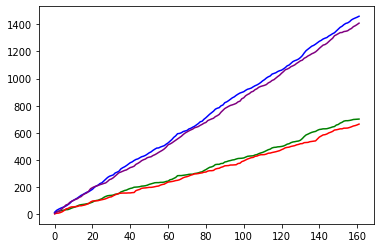

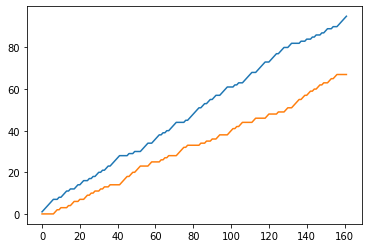

In [98]:
plt.figure()
plt.plot(absol['team15']['runs'],color='green')
plt.plot(absol['team15']['hits'],color='blue')
plt.plot(absol['team15']['runa'], color = 'red')
plt.plot(absol['team15']['hita'],color='purple')
plt.figure()
plt.plot(win['team15'])
plt.plot(loss['team15'])

The next cell employs a similar structure to that above but it allowed us to compile each teams respective stats irelevant to whether the team was home or away.

In [58]:
vteamv =['vavg','v2ba','v2bh','v3ba','v3bh','vhra','vhrh','vrbih','vwa','viwa','vsoa','vfoa','vloba']
hteamv= ['havg','h2ba','h2bh','h3ba','h3bh','hhra','hhrh','hrbih','hwa','hiwa','hsoa','hfoa','hloba']
average = ['avg','2ba','2bh','3ba','3bh','hra','hrh','rbih','wa','iwa','soa','foa','loba']
avg= {}
for t in range(tn):
    avg["team{}".format(t)] = {'avg':[],'2ba':[],'2bh':[],'3ba':[],'3bh':[],'hra':[],'hrh':[],'rbih':[],'wa':[],'iwa':[],'soa':[],'foa':[],'loba':[]}

#avg
    
for t in range(tn):
    for b in range(len(mast.iloc[:,-1])):
            if teams[t] == mast['home'][b] or teams[t] == mast['visitor'][b]:
                if teams[t] == mast['home'][b]:
                    for i in range(len(average)):
                        a = mast[hteamv[i]][b]
                        avg["team{}".format(t)][average[i]].append(a)
                else:
                    for i in range(len(average)):
                        c = mast[vteamv[i]][b]
                        avg["team{}".format(t)][average[i]].append(c)
          

Below I converted the values of the avg dictionary to a dictionary within which each teams data would be stored as a data frame. I plotted a resulting column for one of the teams to see how avg compared to wins and losses.

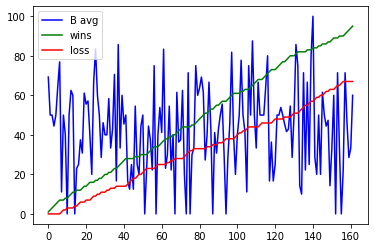

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
#initalizes list of teams for the loop
teaml = teams.tolist()
#converts each teams dictionary values to data frames for easier access and manipulation
for i in range(tn):
     teaml[i] = pd.DataFrame.from_dict(avg['team{}'.format(i)])
        
        
plt.plot(teaml[15]['rbih']*100,color = 'blue',label='B avg')
plt.plot(win['team15'],color = 'green',label='wins')
plt.plot(loss['team15'],color= 'red',label='loss')
plt.legend()

In [60]:
#win['team8']
#total['team0'][vteamv][0:1]
#teaml[1]

The above approach yielded interesting results but it isn't entirely productive for the creation of our model. So the below code creates a dictionary that stores wins as a binary 1 for wins and 0 for losses.

In [93]:
winner = {}
for t in range(tn):
    winner["team{}".format(t)] = []
for t in range(tn):
    gl = 0
    gw = 0
    for b in range(len(mast['winr'][:])):
        if teams[t] == mast['winr'][b] or teams[t] == mast['losr'][b]:
            if teams[t] == mast['winr'][b]:
                winner["team{}".format(t)].append(1.0)
            else:
                winner["team{}".format(t)].append(0.0)

The resulting figure shows a more intuitive representation of wins realtionship to batting average.

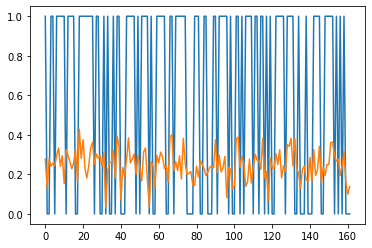

In [94]:
plt.plot(winner['team0'])
plt.plot(teaml[0]['avg'])

The cells below convert each dictionaries values to dataframes and concatenates them for use in our model.

In [101]:
teamw = teams.tolist()
for i in range(tn):
     teamw[i] = pd.DataFrame.from_dict(winner['team{}'.format(i)])

In [102]:
#teamw[0]

In [103]:
dfwin = pd.concat(teamw[:],ignore_index=True)
#dfwin

In [104]:
dfavg = pd.concat(teaml[:],ignore_index=True)
#dfavg

In [105]:
dfavg['wins']=dfwin
dfavg

,avg,2ba,2bh,3ba,3bh,hra,hrh,rbih,wa,iwa,soa,foa,loba,wins
0,0.277778,0.083333,0.300000,0.000000,0.000000,0.000000,0.000000,0.300000,0.111111,0.027778,0.305556,0.416667,0.277778,1.0
1,0.129032,0.032258,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096774,0.000000,0.258065,0.612903,0.225806,0.0
2,0.277778,0.055556,0.200000,0.000000,0.000000,0.027778,0.100000,0.400000,0.083333,0.027778,0.333333,0.388889,0.222222,0.0
3,0.242424,0.000000,0.000000,0.000000,0.000000,0.030303,0.125000,0.500000,0.030303,0.000000,0.151515,0.606061,0.151515,1.0
4,0.256410,0.076923,0.300000,0.000000,0.000000,0.051282,0.200000,0.700000,0.153846,0.000000,0.205128,0.538462,0.205128,1.0
5,0.243243,0.054054,0.222222,0.000000,0.000000,0.000000,0.000000,0.333333,0.162162,0.027027,0.162162,0.594595,0.324324,0.0
6,0.294118,0.058824,0.200000,0.000000,0.000000,0.000000,0.000000,0.400000,0.029412,0.000000,0.117647,0.588235,0.205882,1.0
7,0.333333,0.151515,0.454545,0.000000,0.000000,0.000000,0.000000,0.363636,0.060606,0.000000,0.151515,0.515152,0.212121,1.0
8,0.241379,0.137931,0.571429,0.000000,0.000000,0.000000,0.000000,0.857143,0.068966,0.034483,0.344828,0.413793,0.103448,1.0
9,0.294118,0.088235,0.300000,0.000000,0.000000,0.029412,0.100000,0.500000,0.088235,0.058824,0.058824,0.647059,0.235294,1.0


In [91]:
from sklearn.model_selection import train_test_split
x = dfavg.iloc[:,0:12]
y = dfavg[['wins']]

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3)

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\Kevin Elkin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

the below code was an intial attempt to create a moving average of the averages so they could be better compared to the teams overall record. This was attempted with the dict structure and could be done effectively now that everything is organized wihtin a data frame.

In [120]:
# move = {}
# maverage = ['mbavg','m2ba','m2bh','m3ba','m3bh','mhra','mhrh','mrbih','mwa','miwa','msoa','mfoa','mloba']
# for t in range(tn):
#     move["team{}".format(t)] = {'mbavg':[],'m2ba':[],'m2bh':[],'m3ba':[],'m3bh':[],'mhra':[],'mhrh':[],'mrbih':[],'mwa':[],'miwa':[],'msoa':[],'mfoa':[],'mloba':[]}


# for a in range(tn):
#     for b in range(len(maverage)):
#         move["team{}".format(a)][maverage[b]].append(mov_avg(avg['team{}'.format(a)][average[b]][:],3))


In [ ]:
# import matplotlib as plt
# %matplotlib inline
# import seaborn as sns

# sns.lineplot(range(162), win['team1'].uni)

In [ ]:
# field = mast.iloc[:,8].unique()
# fn = len(field)
# fieldl = field.tolist() 
# fields = {}

# for a in range(fn):
#     fields["field{0}".format(a)] = mast[mast['park']== field[a]]

# avg_at = np.mean(fields['field0']['at'])


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline 
# import seaborn as sns

# # plt.plot(np.log(fields['field0']['at']))
# # plt.plot(fields['field0']['totals'])
# plt.figure()
# #ns.jointplot(fields['field0']['totals'],np.log(fields['field0']['at']),kind='reg')
# sns.lmplot(x="Totalsl_width", hue="species",
#                height=5, data=mast)